## Query

* Airbnb enebles people to rent their properties: rooms or houses.
---------------------------------------
* What actually residents expects and hosts consider focus on might differs.


* What attributes higher price?
* What attributes higher review values?
* Which season is better to join airbnb?

In [27]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import re
import os 


In [28]:
### gather datasets 
files = ['calendar.csv', 'listings.csv', 'reviews.csv']
# base_dir = '/kaggle/input/boston/'
base_dir = './data/'
calender = os.path.join(base_dir, files[0])
listings = os.path.join(base_dir, files[1])
reviews = os.path.join(base_dir, files[2])

calender_df = pd.read_csv(calender)
listings_df = pd.read_csv(listings)
reviews_df = pd.read_csv(reviews)

In [29]:
# display dataframes to explore
for df in [listings_df, calender_df, reviews_df]:
    display(df.head(5))

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [30]:
## listing info 
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [31]:
## calender info
calender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [32]:
## review info
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


# Preprocessing and Explore

## Listings_df

In [33]:
listings_number = listings_df['id'].count()
unique_host_number = listings_df['host_id'].nunique()
unique_host_percentage = round(unique_host_number / listings_number, 3) * 100
duplicated_host_number = listings_df['host_id'].duplicated().sum()
duplicated_host_percentage = round(duplicated_host_number/ listings_number, 3) * 100
print(f'The number of listings is {listings_number}')
print(f'The number of unique_host is {unique_host_number} and the percentage is {unique_host_percentage}%')
print(f'The number of listings is {duplicated_host_number} and the percentage is {duplicated_host_percentage}%')

The number of listings is 3585
The number of unique_host is 2181 and the percentage is 60.8%
The number of listings is 1404 and the percentage is 39.2%


In [34]:
def remove_percentage(df):
    """ remover percentage % and convert it to float type"""
    for col in df.columns:
        if 'rate' in col:
            df[col] = df[col].apply(lambda x: str(x).replace('%', ''))
            df[col] = df[col].astype('float')
    return df

In [35]:
listings_df = remove_percentage(listings_df)

In [36]:
def to_numerate(df, col):
    df[col] = df[col].apply(lambda x: float(re.sub(r"[^0-9\.]", "", x)) if x else np.NaN)
    df[col] = df[col].astype(float)
    return df

In [37]:
listings_df = to_numerate(listings_df, 'price')

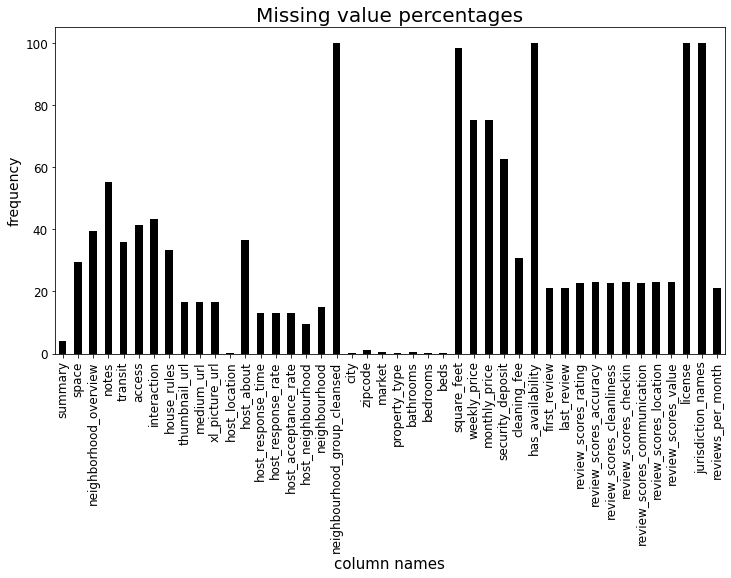

In [38]:
###### plot nullvalue distribution

num_nulls = listings_df.isnull().mean()*100
plt.figure(figsize=(12, 6))
plt.ylabel('frequency', fontsize = 14)
plt.xlabel('column names', fontsize = 15)
plt.title('Missing value percentages', fontsize = 20)
num_nulls[(num_nulls > 0)].plot(kind = 'bar', color = 'black', fontsize = 12)
plt.show()

In [39]:
non_num_cols = listings_df.select_dtypes(include=['object']).columns
listings_df[non_num_cols]

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,extra_people,calendar_updated,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/12147973,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...",...,$0.00,2 weeks ago,2016-09-06,NaN,NaN,f,f,moderate,f,f
1,https://www.airbnb.com/rooms/3075044,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,...,$0.00,a week ago,2016-09-06,2014-06-01,2016-08-13,f,t,moderate,f,f
2,https://www.airbnb.com/rooms/6976,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"PUBLIC TRANSPORTATION: From the house, quick p...",...,$20.00,5 days ago,2016-09-06,2009-07-19,2016-08-05,f,f,moderate,t,f
3,https://www.airbnb.com/rooms/1436513,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,There are buses that stop right in front of th...,...,$25.00,a week ago,2016-09-06,2016-08-28,2016-08-28,f,f,moderate,f,f
4,https://www.airbnb.com/rooms/7651065,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,From Logan Airport and South Station you have...,...,$0.00,2 weeks ago,2016-09-06,2015-08-18,2016-09-01,f,f,flexible,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,https://www.airbnb.com/rooms/8373729,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,NaN,NaN,...,$24.00,5 days ago,2016-09-06,2015-09-18,2016-08-27,f,t,strict,f,f
3581,https://www.airbnb.com/rooms/14844274,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,NaN,"There is green line, BU shuttle in front of th...",...,$0.00,never,2016-09-06,NaN,NaN,f,f,strict,f,f
3582,https://www.airbnb.com/rooms/14585486,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...","Depending on when you arrive, I can be here to...","Public transport is 5 minuts away, but walking...",...,$0.00,3 weeks ago,2016-09-06,NaN,NaN,f,f,flexible,f,f
3583,https://www.airbnb.com/rooms/14603878,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,NaN,NaN,...,$30.00,today,2016-09-06,2016-08-27,2016-09-04,f,f,strict,f,f


## drop irrelevan columns

In [40]:
drop_cols = ['listing_url', 'thumbnail_url', 'medium_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'picture_url', 'xl_picture_url', 'host_url',
       'host_name', 'host_location', 'host_about', 'host_acceptance_rate',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_total_listings_count', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'first_review', 'last_review',
       'requires_license', 'license', 'jurisdiction_names',
       'reviews_per_month','neighbourhood_group_cleansed','host_response_time',
       'latitude', 'longitude','access','interaction','host_since','house_rules','host_verifications']

In [41]:
listings_df = listings_df.drop(columns = drop_cols)

In [42]:
listings_df[['host_is_superhost', 'host_has_profile_pic', 
             'host_identity_verified','instant_bookable', 
             'require_guest_profile_picture', 
             'require_guest_phone_verification']] = listings_df[['host_is_superhost', 'host_has_profile_pic', 
             'host_identity_verified','instant_bookable', 
             'require_guest_profile_picture', 
             'require_guest_phone_verification',]].replace({"t": True, "f": False})

### review_columns

In [43]:
listings_df.rename(columns = {'id': 'listing_id'}, inplace = True)

,price,host_is_superhost,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,250.0,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65.0,False,100.0,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0
2,65.0,True,100.0,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0
3,75.0,False,100.0,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0
4,79.0,True,100.0,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
3580,69.0,False,96.0,4,90.0,10.0,10.0,10.0,10.0,8.0,9.0
3581,150.0,False,10.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3582,198.0,False,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3583,65.0,False,100.0,2,90.0,9.0,8.0,9.0,9.0,8.0,7.0


<AxesSubplot:>

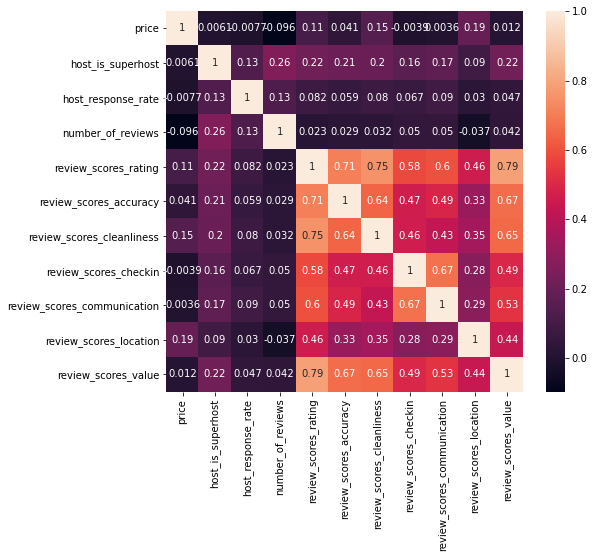

In [44]:
display(listings_df[['price', 'host_is_superhost','host_response_rate', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']])

plt.figure(figsize = (8, 7))
display(sns.heatmap(listings_df[['price','host_is_superhost','host_response_rate', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']].corr(), annot=True))

* strong correlations are following

* review_scores_rating and review_scores_value are correlated (0.79)
* review_scores_rating and review_scores_cleanliness are also correlated (0.75)
* review_scores_cleanliness and review_scores_value (0.65)
* review_scores_checkin and review_scores_communication (0.67)

In [45]:
listings_df.head()

,listing_id,host_id,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,12147973,31303940,NaN,False,1,True,False,House,Entire home/apt,4,...,NaN,NaN,NaN,NaN,NaN,False,moderate,False,False,1
1,3075044,2572247,100.0,False,1,True,True,Apartment,Private room,2,...,9.0,10.0,10.0,9.0,9.0,True,moderate,False,False,1
2,6976,16701,100.0,True,1,True,True,Apartment,Private room,2,...,9.0,10.0,10.0,9.0,10.0,False,moderate,True,False,1
3,1436513,6031442,100.0,False,1,True,False,House,Private room,4,...,10.0,10.0,10.0,10.0,10.0,False,moderate,False,False,1
4,7651065,15396970,100.0,True,1,True,True,House,Private room,2,...,10.0,10.0,10.0,9.0,10.0,False,flexible,False,False,1


In [46]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3585 non-null   int64  
 1   host_id                           3585 non-null   int64  
 2   host_response_rate                3114 non-null   float64
 3   host_is_superhost                 3585 non-null   bool   
 4   host_listings_count               3585 non-null   int64  
 5   host_has_profile_pic              3585 non-null   bool   
 6   host_identity_verified            3585 non-null   bool   
 7   property_type                     3582 non-null   object 
 8   room_type                         3585 non-null   object 
 9   accommodates                      3585 non-null   int64  
 10  bathrooms                         3571 non-null   float64
 11  bedrooms                          3575 non-null   float64
 12  beds  

In [47]:
counter = Counter()
for i in range(len(listings_df['amenities'])):
    counter.update(listings_df['amenities'][i].replace("{", "").replace("}", "").split(','))

In [48]:
### multi-hot-encode 
amenities = pd.DataFrame(listings_df[['listing_id', 'host_id']])
for el in list(counter.keys()):
    amenities[el] = listings_df['amenities'].apply(lambda e: 1 if el in e else 0)
listings_df.drop('amenities', axis = 1, inplace = True)

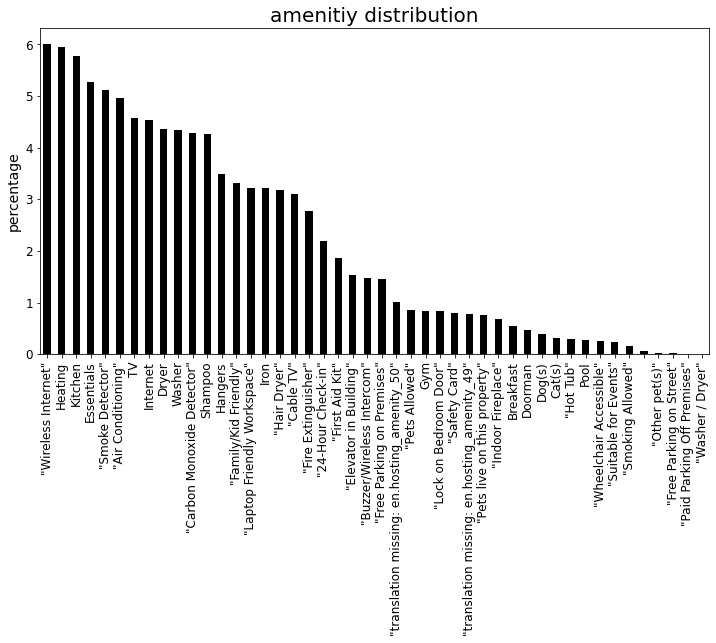

In [49]:
### common amenities. 
amenities_ = (pd.Series(counter) / pd.Series(counter).sum() * 100).sort_values(ascending = False)
plt.figure(figsize=(12, 6))
plt.ylabel('percentage', fontsize = 14)
plt.title('amenitiy distribution', fontsize = 20)
amenities_.plot(kind = 'bar', color = 'black', fontsize = 12)
plt.show()

In [54]:
for room_type in listings_df['room_type'].unique():
    print(room_type)
    for col in ['price', 'review_scores_value']:
        print(col)
        print(listings_df[listings_df['room_type'] == room_type].drop(['listing_id','host_id'], axis = 1).corr()[col].sort_values(ascending = False))
        print('\n')

Entire home/apt
price
price                               1.000000
bathrooms                           0.364400
bedrooms                            0.333688
accommodates                        0.296840
beds                                0.281357
guests_included                     0.121607
require_guest_phone_verification    0.121137
review_scores_rating                0.097478
review_scores_cleanliness           0.085709
host_listings_count                 0.069439
review_scores_location              0.058539
calculated_host_listings_count      0.057653
minimum_nights                      0.056029
host_is_superhost                   0.053481
review_scores_accuracy              0.032515
host_response_rate                  0.027823
host_has_profile_pic                0.025647
review_scores_communication         0.018117
review_scores_checkin               0.011663
review_scores_value                 0.004824
host_identity_verified             -0.006660
require_guest_profile_picture    

In [55]:
for room_type in listings_df['room_type'].unique():
    print(room_type)
    for col in ['price', 'review_scores_value']:
        print(col)
        print(pd.merge(listings_df[listings_df['room_type'] == room_type][['listing_id', 'price','review_scores_value']], amenities, on = 'listing_id', how = 'inner').drop(['listing_id', 'host_id'], axis = 1).corr()[col].sort_values(ascending=False))
        print('\n')
        

Entire home/apt
price
price                                           1.000000
Washer                                          0.153172
TV                                              0.140729
"Family/Kid Friendly"                           0.136554
"Air Conditioning"                              0.127539
"Elevator in Building"                          0.117907
Doorman                                         0.116512
"Indoor Fireplace"                              0.116194
"Cable TV"                                      0.110252
Gym                                             0.099766
Dryer                                           0.097015
Dog(s)                                          0.080901
"Suitable for Events"                           0.080613
"Pets live on this property"                    0.066707
Cat(s)                                          0.060172
"First Aid Kit"                                 0.046409
Internet                                        0.045644
Kitchen  

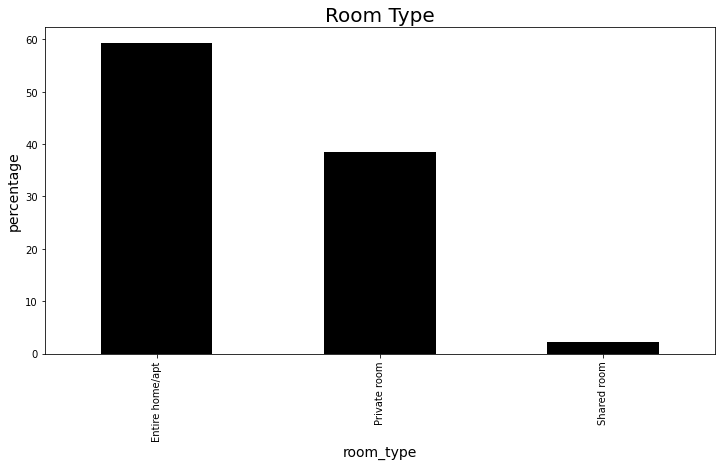

In [56]:
### roomtype
plt.figure(figsize=(12, 6))
plt.ylabel('percentage', fontsize = 14)
plt.xlabel('room type', fontsize = 14)
plt.title('Room Type', fontsize = 20)
(listings_df.groupby(['room_type'])['listing_id'].count() / listings_df.groupby(['room_type'])['listing_id'].count().sum() * 100).plot(kind = 'bar', color = 'black')
plt.show()

In [57]:
listings_df.price

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
        ...  
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3585, dtype: float64

In [58]:
# The entire price description without separating room types 
listings_df['price'].describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

### room type separated_data

In [59]:
### display price 
for el in listings_df['room_type'].unique():
    print(el)
    display(listings_df[listings_df.room_type == el]['price'].describe())

Entire home/apt


count    2127.000000
mean      227.436765
std       157.852765
min        11.000000
25%       150.000000
50%       199.000000
75%       269.000000
max      4000.000000
Name: price, dtype: float64

Private room


count    1378.000000
mean       96.041364
std        85.093706
min        10.000000
25%        62.000000
50%        80.000000
75%       100.000000
max      1400.000000
Name: price, dtype: float64

Shared room


count     80.000000
mean      92.762500
std      108.733822
min       20.000000
25%       45.000000
50%       60.000000
75%       99.000000
max      750.000000
Name: price, dtype: float64

In [60]:
def remove_price_outliers(room_type_):
    room_type = listings_df.query(f"room_type == '{room_type_}'")
    q1 = room_type['price'].quantile(0.25)
    q3 = room_type['price'].quantile(0.75)
    IQR =  q3 - q1
    IQR
    right_outliers = room_type[room_type['price'] > q3 +  IQR * 1.5]['price']
    lert_outliers = room_type[room_type['price'] <  q1 - IQR * 1.5]['price']
    left_outliers_percent = lert_outliers.shape[0] / room_type.shape[0] * 100
    right_outliers_percent = right_outliers.shape[0] / room_type.shape[0] * 100
    removed_outliers = room_type[(room_type['price'] < q3 +  IQR * 1.5) & (room_type['price'] > q1 -  IQR * 1.5)]
    print(room_type_)
    print(f'left_outliers {round(left_outliers_percent, 2)}%, right_outliers {round(right_outliers_percent, 2)}%')
    
    return removed_outliers

In [61]:
### show the percentage of outliers in each room_type by price
Entire_home_apt = remove_price_outliers('Entire home/apt')
private_room = remove_price_outliers('Private room')
shared_room = remove_price_outliers('Shared room')

Entire home/apt
left_outliers 0.0%, right_outliers 4.84%
Private room
left_outliers 0.0%, right_outliers 8.27%
Shared room
left_outliers 0.0%, right_outliers 7.5%


In [62]:
removed_outlier_lists = {"Entire_home_apt": Entire_home_apt, 
                         "private_room": private_room,
                         "shared_room": shared_room}
for key, el in removed_outlier_lists.items():
    print(key)
    display(el['price'].describe())

Entire_home_apt


count    2024.000000
mean      205.491601
std        77.395364
min        11.000000
25%       150.000000
50%       199.000000
75%       250.000000
max       429.000000
Name: price, dtype: float64

private_room


count    1263.000000
mean       80.236738
std        27.847050
min        10.000000
25%        60.000000
50%        75.000000
75%        99.000000
max       155.000000
Name: price, dtype: float64

shared_room


count     74.000000
mean      68.202703
std       34.216466
min       20.000000
25%       44.250000
50%       60.000000
75%       84.750000
max      179.000000
Name: price, dtype: float64

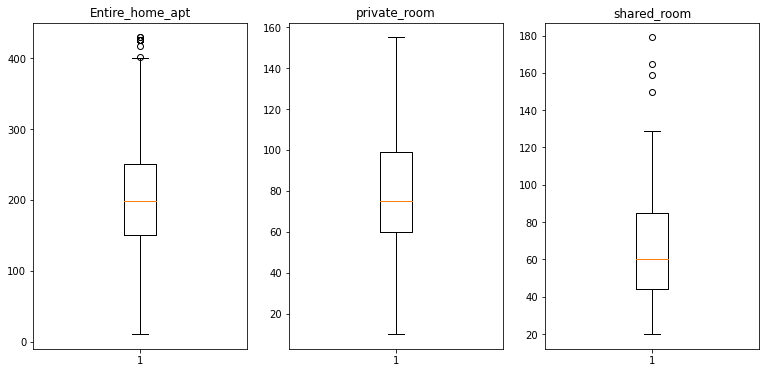

In [63]:
f, ax = plt.subplots(1,3, figsize = (13, 6))
ax[0].boxplot(Entire_home_apt.price)
ax[0].set_title('Entire_home_apt')
ax[1].boxplot(private_room.price)
ax[1].set_title('private_room')
ax[2].boxplot(shared_room.price)
ax[2].set_title('shared_room')
plt.show()

### superhost
* reference: https://www.airdna.co/blog/airbnb_superhost_status .
How to Qualify for Airbnb Superhost Status
________________________________________________________________________
* Host a minimum of 10 stays in a year
* Respond to guests quickly and maintain a 90% response rate or higher
* Have at least 80% 5-star reviews
* Honor confirmed reservations (meaning hosts should rarely cancel)

In [64]:
listings_df.groupby('host_is_superhost')['review_scores_value'].mean()

host_is_superhost
False    9.076371
True     9.720812
Name: review_scores_value, dtype: float64

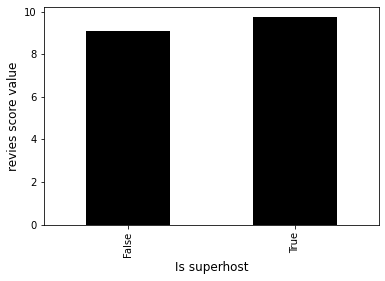

In [65]:
listings_df.groupby('host_is_superhost')['review_scores_value'].mean().plot(kind = 'bar', color = 'black')
plt.xlabel('Is superhost', fontsize = 12)
plt.ylabel('revies score value', fontsize = 12)
plt.show()

In [66]:
## convert object to float
listings_df[listings_df['cleaning_fee'].notna()] = to_numerate(listings_df[listings_df['cleaning_fee'].notna()], 'cleaning_fee')
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].astype('float')
listings_df[listings_df['extra_people'].notna()] = to_numerate(listings_df[listings_df['extra_people'].notna()], 'extra_people')
listings_df['extra_people'] = listings_df['extra_people'].astype('float')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
dummied_listings_df = pd.get_dummies(listings_df)

In [68]:
dummied_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   listing_id                           3585 non-null   int64  
 1   host_id                              3585 non-null   int64  
 2   host_response_rate                   3114 non-null   float64
 3   host_is_superhost                    3585 non-null   bool   
 4   host_listings_count                  3585 non-null   int64  
 5   host_has_profile_pic                 3585 non-null   bool   
 6   host_identity_verified               3585 non-null   bool   
 7   accommodates                         3585 non-null   int64  
 8   bathrooms                            3571 non-null   float64
 9   bedrooms                             3575 non-null   float64
 10  beds                                 3576 non-null   float64
 11  price                         

In [69]:
missing_df = dummied_listings_df.isna().mean() 
display(missing_df[missing_df > 0])
dummied_listings_df[missing_df[missing_df > 0].index].info()

host_response_rate             0.131381
bathrooms                      0.003905
bedrooms                       0.002789
beds                           0.002510
cleaning_fee                   0.308787
review_scores_rating           0.226778
review_scores_accuracy         0.229568
review_scores_cleanliness      0.228173
review_scores_checkin          0.228731
review_scores_communication    0.228173
review_scores_location         0.229289
review_scores_value            0.229010
dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           3114 non-null   float64
 1   bathrooms                    3571 non-null   float64
 2   bedrooms                     3575 non-null   float64
 3   beds                         3576 non-null   float64
 4   cleaning_fee                 2478 non-null   float64
 5   review_scores_rating         2772 non-null   float64
 6   review_scores_accuracy       2762 non-null   float64
 7   review_scores_cleanliness    2767 non-null   float64
 8   review_scores_checkin        2765 non-null   float64
 9   review_scores_communication  2767 non-null   float64
 10  review_scores_location       2763 non-null   float64
 11  review_scores_value          2764 non-null   float64
dtypes: float64(12)
memory usage: 336.2 KB


In [70]:
dummied_listings_df

,listing_id,host_id,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,...,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
0,12147973,31303940,NaN,False,1,True,False,4,1.5,2.0,...,0,0,0,0,0,1,0,1,0,0
1,3075044,2572247,100.0,False,1,True,True,2,1.0,1.0,...,0,0,0,0,0,1,0,1,0,0
2,6976,16701,100.0,True,1,True,True,2,1.0,1.0,...,0,0,0,0,0,1,0,1,0,0
3,1436513,6031442,100.0,False,1,True,False,4,1.0,1.0,...,0,0,0,0,0,1,0,1,0,0
4,7651065,15396970,100.0,True,1,True,True,2,1.5,1.0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,19246369,96.0,False,28,True,True,3,1.0,1.0,...,0,0,0,0,0,1,0,0,1,0
3581,14844274,37366454,10.0,False,2,True,True,2,1.0,1.0,...,0,0,0,0,0,1,0,0,1,0
3582,14585486,11311919,78.0,False,1,True,False,4,1.0,1.0,...,0,0,0,0,0,1,1,0,0,0
3583,14603878,74318064,100.0,False,4,True,True,2,1.0,1.0,...,0,0,0,0,0,1,0,0,1,0


In [71]:
for el in missing_df[missing_df > 0].index:
    if el != 'price':
        dummied_listings_df[el].fillna(dummied_listings_df[el].mean(), inplace = True)

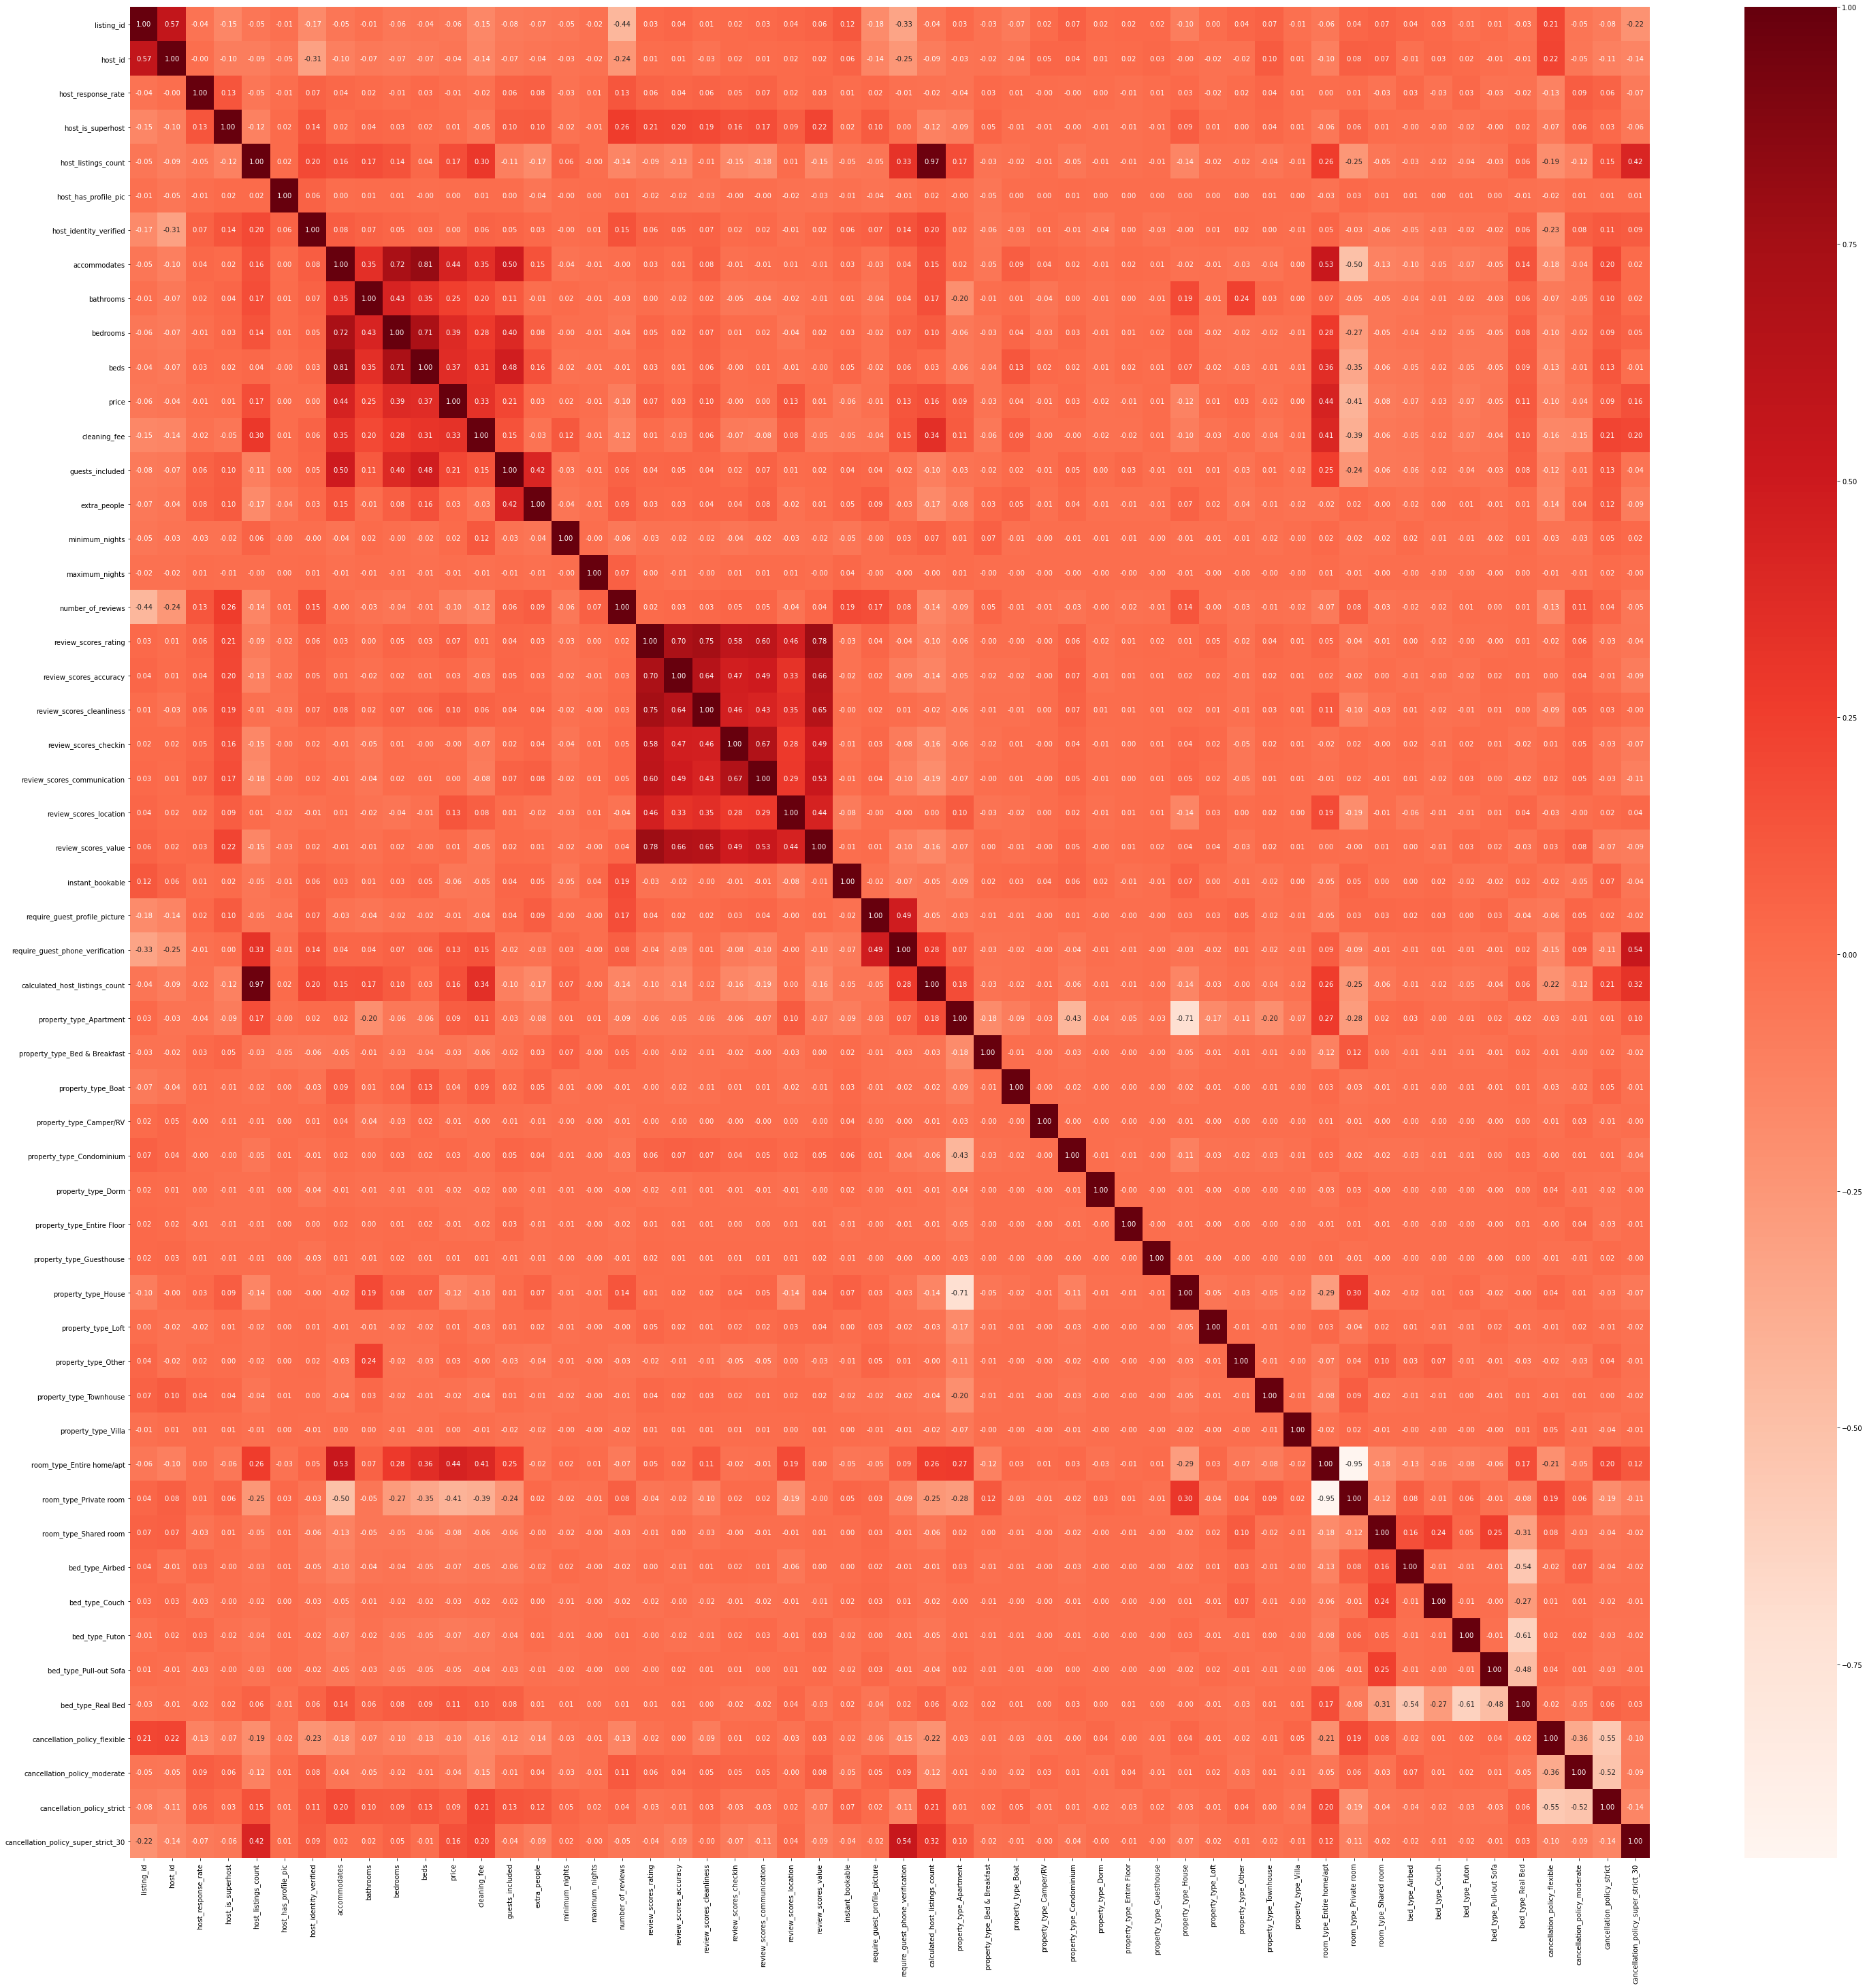

In [72]:
plt.figure(figsize=(50,50))
cor = dummied_listings_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt=".2f")
plt.show()

In [73]:
for room_type in ['room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']:
    print(room_type)
    for col in ['price', 'review_scores_value']:
        print(col)
        print(dummied_listings_df[dummied_listings_df[room_type] == 1].drop(['listing_id','host_id'], axis = 1).corr()[col].sort_values(ascending = False))
        print('\n')

room_type_Entire home/apt
price
price                                  1.000000
bathrooms                              0.364287
bedrooms                               0.333685
accommodates                           0.296840
beds                                   0.281409
cleaning_fee                           0.191584
cancellation_policy_super_strict_30    0.122478
guests_included                        0.121607
require_guest_phone_verification       0.121137
property_type_House                    0.084738
host_listings_count                    0.069439
bed_type_Real Bed                      0.067889
review_scores_rating                   0.059941
calculated_host_listings_count         0.057653
minimum_nights                         0.056029
host_is_superhost                      0.053481
extra_people                           0.052246
review_scores_cleanliness              0.049249
review_scores_location                 0.028761
host_has_profile_pic                   0.025647
property

## calender_df

In [74]:
calender_df['available'].replace({'f': False, 't':True}, inplace = True)
calender_df['date'] = pd.to_datetime(calender_df['date'])
calender_df['date_month'] = calender_df['date'].dt.month
calender_df['date_year_month'] = calender_df['date'].dt.strftime('%Y-%m')
calender_df['date_year'] = calender_df['date'].dt.year

In [75]:
calender_df[calender_df.price.notna()] = to_numerate(calender_df[calender_df.price.notna()], 'price')
calender_df.price = calender_df.price.astype('float')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
## show availability by time in month
availability = calender_df.groupby(['date_month'])['available'].value_counts() / (calender_df.groupby('date_month')['available'].value_counts().groupby('date_month').sum()) * 100
availability

date_month  available
1           True         56.834824
            False        43.165176
2           True         56.579157
            False        43.420843
3           False        50.361621
            True         49.638379
4           False        52.238334
            True         47.761666
5           False        51.783819
            True         48.216181
6           False        50.984384
            True         49.015616
7           False        50.557724
            True         49.442276
8           False        50.019790
            True         49.980210
9           False        68.955196
            True         31.044804
10          False        58.310095
            True         41.689905
11          True         54.738799
            False        45.261201
12          True         54.870194
            False        45.129806
Name: available, dtype: float64

In [77]:
### the number of unique listing_id 
### check if all unique listing_ids exist in calender_if
print("The number of unique listing_id in listings_df: ", listings_df.listing_id.nunique())
print("The number of unique listing_id in calender_df: ", calender_df.listing_id.nunique())

The number of unique listing_id in listings_df:  3585
The number of unique listing_id in calender_df:  3585


In [78]:
### The average number of null values
calender_df.isnull().mean()

listing_id         0.000000
date               0.000000
available          0.000000
price              0.508716
date_month         0.000000
date_year_month    0.000000
date_year          0.000000
dtype: float64

## concatenation: (listings_df, calender_df)

In [79]:
df = listings_df.drop('price', axis =1).merge(calender_df, on='listing_id', how = 'inner')

In [80]:
calender_df[(calender_df['price'].notnull())].groupby('listing_id')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
listing_id,,,,,,,,
3353,249.0,35.204819,1.302222,32.0,35.0,36.0,36.0,36.0
5506,344.0,147.267442,17.043196,145.0,145.0,145.0,145.0,275.0
6695,324.0,197.407407,17.553300,195.0,195.0,195.0,195.0,325.0
6976,319.0,65.000000,0.000000,65.0,65.0,65.0,65.0,65.0
8792,248.0,154.000000,0.000000,154.0,154.0,154.0,154.0,154.0
...,...,...,...,...,...,...,...,...
14924831,66.0,169.515152,10.897060,132.0,162.0,173.0,180.0,180.0
14928000,365.0,55.000000,0.000000,55.0,55.0,55.0,55.0,55.0
14928333,339.0,105.380531,9.677631,70.0,90.5,111.0,113.0,113.0


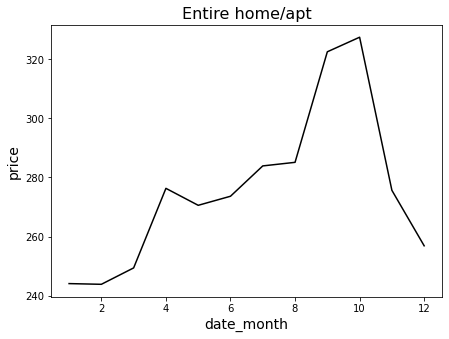

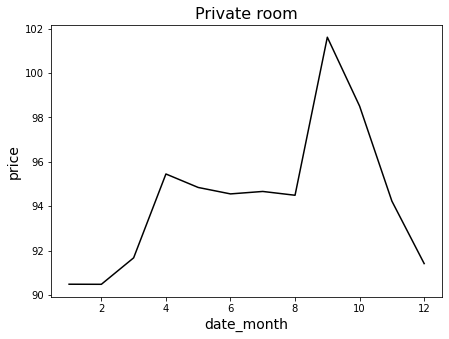

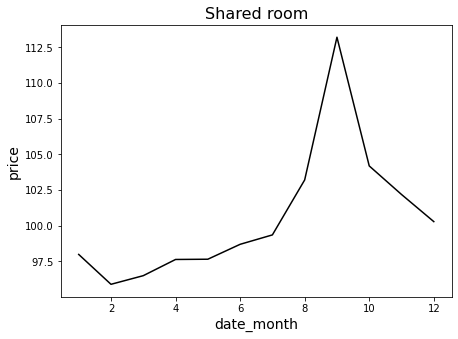

In [81]:
for room_type in df.room_type.unique():
    plt.figure(figsize = (7, 5))
    plt.title(room_type, fontsize = 16)
    plt.ylabel('price', fontsize = 14)
    plt.xlabel('Month', fontsize = 14)
    df[df['room_type'] == room_type].groupby('date_month').price.mean().plot(color = 'black')
    plt.show()

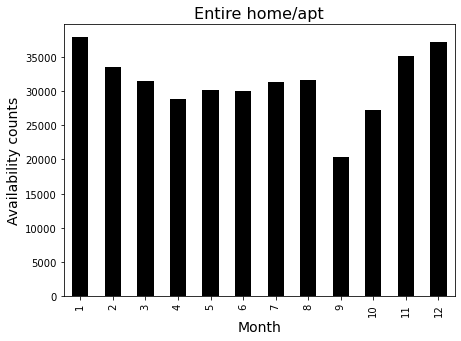

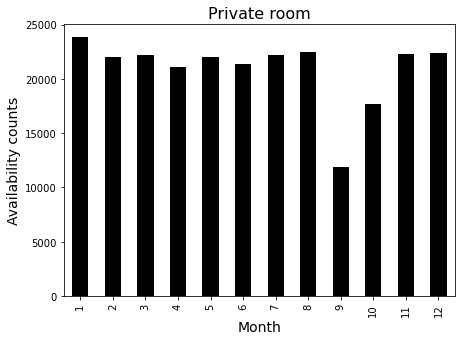

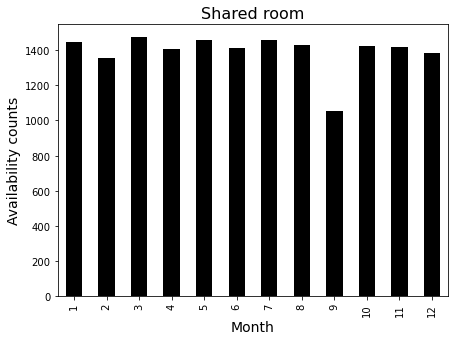

In [82]:
for room_type in df.room_type.unique():
    plt.figure(figsize = (7, 5))
    plt.title(room_type, fontsize = 16)
    plt.ylabel('Availability counts', fontsize = 14)
    plt.xlabel('Month', fontsize = 14)
    df[df['room_type'] == room_type].groupby(['available'])['date_month'].get_group(True).value_counts().plot(kind='bar', color='black')
    plt.show()

In [83]:
df['host_response_rate'] = df['host_response_rate'].apply(lambda x: str(x).replace('%', ''))
df['host_response_rate'] = df['host_response_rate'].astype(float)

#### medium url 
https://medium.com/@kazuma1001/the-difference-between-what-hosts-expect-and-what-residents-expect-4d021e4109b8